# Explore *hatecrime.csv*
Questions:
- How has the number of hate crimes changed over the years?
- What are the proportions of bias of reported incidents each year?
    - Within each bias category, bias against which group is most prevalent?
- In each state, which bias category are most prevalent?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load clean_hatecrime.csv
hc = pd.read_csv("./../datasets/clean_hate_crime.csv")

C:\Users\tammi\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### How has the number of hate crimes changed over the years?

In [5]:
num_hc = pd.DataFrame(hc.groupby("data_year")["incident_id"].count())
num_hc.reset_index(inplace = True)
num_hc.columns = ["year","num_incidents"]
num_hc

,year,num_incidents
0,1991,4589
1,1992,6667
2,1993,7608
3,1994,5954
4,1995,7950
5,1996,8790
6,1997,8107
7,1998,7902
8,1999,7944
9,2000,8219


<AxesSubplot:xlabel='year'>

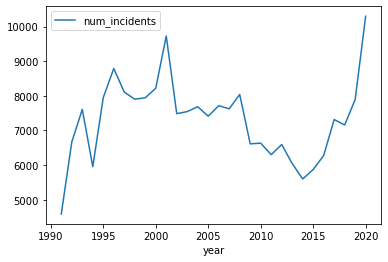

In [6]:
num_hc.plot("year", "num_incidents")

**Interpretation: The number of reported incidents have gone down since 2000's but is on the rise again since 2015.**

### What are the proportions of bias of reported incidents each year?

In [7]:
# Gather what type of biases are recorded
biases = []
for bias in hc["bias_desc"]:
    if ";" not in bias and bias not in biases:
        biases.append(bias)
    elif ";" in bias:
        # Take into account when multiple biases recorded
        sub_biases = bias.split(";")
        for sub_bias in sub_biases:
            if sub_bias not in biases:
                biases.append(sub_bias)    
biases

['Anti-Black or African American',
 'Anti-White',
 'Anti-Jewish',
 'Anti-Arab',
 'Anti-Protestant',
 'Anti-Other Religion',
 'Anti-Islamic (Muslim)',
 'Anti-Gay (Male)',
 'Anti-Asian',
 'Anti-Catholic',
 'Anti-Heterosexual',
 'Anti-Hispanic or Latino',
 'Anti-Other Race/Ethnicity/Ancestry',
 'Anti-Multiple Religions, Group',
 'Anti-Multiple Races, Group',
 'Anti-Lesbian (Female)',
 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
 'Anti-American Indian or Alaska Native',
 'Anti-Atheism/Agnosticism',
 'Anti-Bisexual',
 'Anti-Physical Disability',
 'Anti-Mental Disability',
 'Anti-Gender Non-Conforming',
 'Anti-Female',
 'Anti-Transgender',
 'Anti-Native Hawaiian or Other Pacific Islander',
 'Anti-Male',
 "Anti-Jehovah's Witness",
 'Anti-Mormon',
 'Anti-Buddhist',
 'Anti-Sikh',
 'Anti-Other Christian',
 'Anti-Hindu',
 'Anti-Eastern Orthodox (Russian, Greek, Other)',
 "Unknown (offender's motivation not known)"]

In [8]:
# Create bias categories: race/ethnicity (race/ethn), "sex", "lgbt", "religion", "disability", "other"
bias_cat_dic = {"race/ethn": ['Anti-Black or African American', 'Anti-White','Anti-Arab',
                              'Anti-Asian', 'Anti-Hispanic or Latino','Anti-Other Race/Ethnicity/Ancestry',
                              'Anti-Multiple Races, Group', 'Anti-American Indian or Alaska Native',
                              'Anti-Native Hawaiian or Other Pacific Islander',
                              'Anti-Eastern Orthodox (Russian, Greek, Other)'],
               "sex": ['Anti-Female', 'Anti-Male'],
               "lgbt": ['Anti-Gay (Male)','Anti-Heterosexual','Anti-Lesbian (Female)',
                        'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)','Anti-Bisexual',
                       'Anti-Gender Non-Conforming','Anti-Transgender',],
               "religion":['Anti-Jewish','Anti-Protestant','Anti-Other Religion','Anti-Islamic (Muslim)',
                          'Anti-Catholic','Anti-Multiple Religions, Group','Anti-Atheism/Agnosticism', 
                           "Anti-Jehovah's Witness",'Anti-Mormon','Anti-Buddhist','Anti-Sikh',
                           'Anti-Other Christian','Anti-Hindu',],
               "disability":['Anti-Physical Disability','Anti-Mental Disability'],
               "other":["Unknown (offender's motivation not known)"]}

In [9]:
# ID what bias category each hate crime incidence is and add to dataframe
bias_cat = []
for bias in hc["bias_desc"]:
    if ";" not in bias:
        for key in bias_cat_dic:
            bias_lst = bias_cat_dic[key]
            if bias in bias_lst:
                bias_cat.append(key)
                break
    elif ";" in bias:
        # for incidents with more than one biases (these bias_cat begins with "mix")
        sub_biases = bias.split(";")
        temp_cat = "mix"
        for sub_bias in sub_biases:
            for key in bias_cat_dic:
                bias_lst = bias_cat_dic[key]
                if sub_bias in bias_lst:
                    temp_cat = temp_cat + "," + key
                    break
        bias_cat.append(temp_cat)

In [10]:
# Add bias category to dataframe
hc["bias_cat"] = bias_cat

In [11]:
# hc without mix bias
nomix_hc = hc[~hc["bias_cat"].str.contains("mix")]
nomix_hc

,Unnamed: 0,incident_id,data_year,pub_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias,bias_cat
0,0,3015,1991,Rogers,City,AR,Arkansas,West South Central,South,5,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,race/ethn
1,1,3016,1991,Hope,City,AR,Arkansas,West South Central,South,6,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,race/ethn
2,2,43,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,race/ethn
3,3,44,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,race/ethn
4,4,3017,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,race/ethn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219552,219572,1318026,2020,Sheridan,City,WY,Wyoming,Mountain,West,5,...,Not Hispanic or Latino,2,Intimidation,2.0,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S,lgbt
219553,219573,1142103,2020,Evanston,City,WY,Wyoming,Mountain,West,5,...,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Park/Playground,Anti-White,Government,S,S,race/ethn
219554,219574,1318018,2020,Evanston,City,WY,Wyoming,Mountain,West,5,...,Not Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S,race/ethn
219555,219575,1318022,2020,Evanston,City,WY,Wyoming,Mountain,West,5,...,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Female,Individual,S,S,sex


In [12]:
# Create num bias category each year (all, including mix)
num_bias_hc = pd.DataFrame(hc.groupby(["data_year","bias_cat"])["incident_id"].count())
num_bias_hc.reset_index(inplace = True)
num_bias_hc.columns = ["year", "bias_cat", "num_bias_cat"]
num_bias_hc["prop_bias"] = num_bias_hc["num_bias_cat"]/num_bias_hc.groupby("year")["num_bias_cat"].transform("sum")
num_bias_hc

,year,bias_cat,num_bias_cat,prop_bias
0,1991,lgbt,405,0.088255
1,1991,"mix,lgbt,race/ethn",2,0.000436
2,1991,"mix,lgbt,religion",1,0.000218
3,1991,"mix,race/ethn,lgbt",2,0.000436
4,1991,"mix,race/ethn,race/ethn",2,0.000436
...,...,...,...,...
337,2020,"mix,sex,race/ethn",4,0.000388
338,2020,"mix,sex,religion",1,0.000097
339,2020,race/ethn,6564,0.637343
340,2020,religion,1556,0.151083


**Since so few mix bias_cat, omitting it below for further analysis**

In [13]:
# Create num bias category each year (no mix)
num_bias_hc = pd.DataFrame(nomix_hc.groupby(["data_year","bias_cat"])["incident_id"].count())
num_bias_hc.reset_index(inplace = True)
num_bias_hc.columns = ["year", "bias_cat", "num_bias_cat"]
num_bias_hc["prop_bias"] = num_bias_hc["num_bias_cat"]/num_bias_hc.groupby("year")["num_bias_cat"].transform("sum")
num_bias_hc

,year,bias_cat,num_bias_cat,prop_bias
0,1991,lgbt,405,0.088409
1,1991,race/ethn,3263,0.712290
2,1991,religion,913,0.199301
3,1992,lgbt,773,0.115962
4,1992,race/ethn,4728,0.709271
...,...,...,...,...
119,2020,disability,174,0.017530
120,2020,lgbt,1547,0.155853
121,2020,race/ethn,6564,0.661294
122,2020,religion,1556,0.156760


In [ ]:
# Plot num_bias_cat over year

### In each state, which bias category are most prevalent?